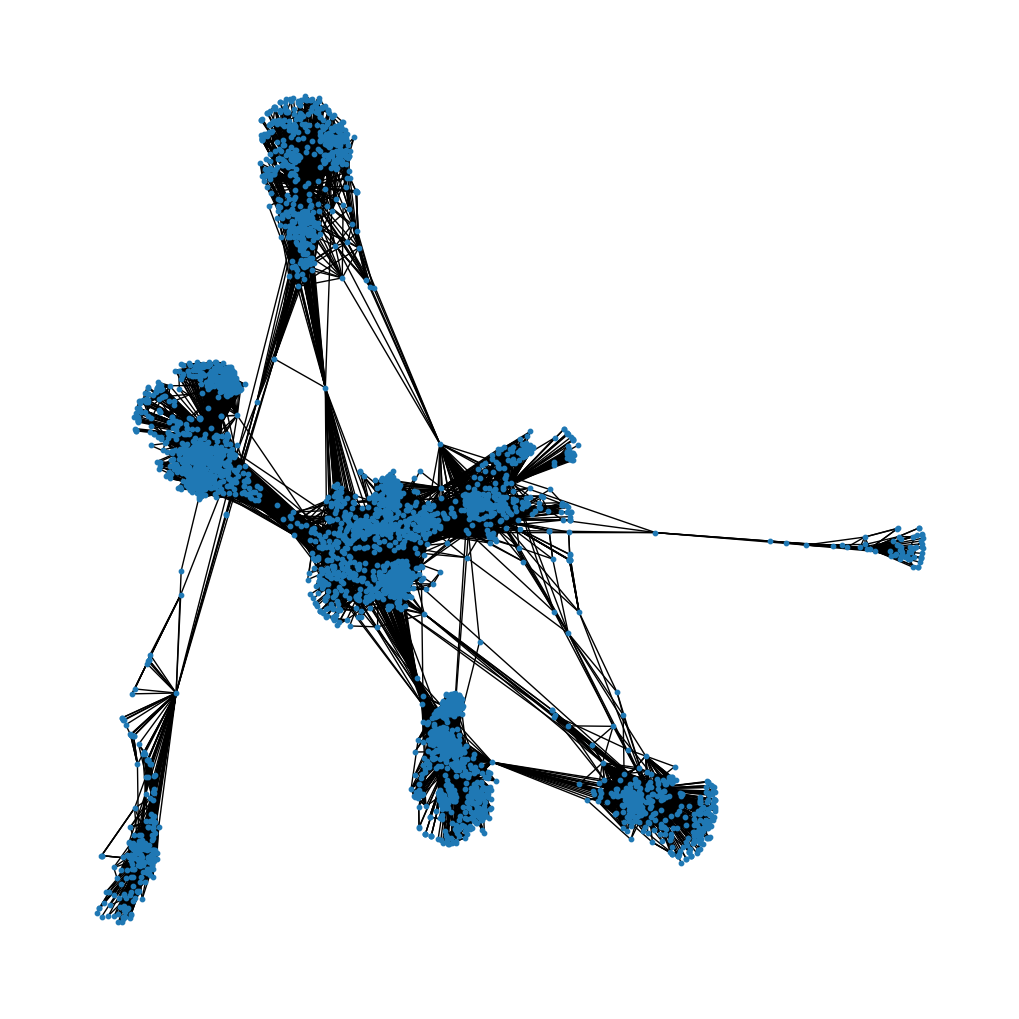

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

edges_file = 'facebook_combined.txt'  
G = nx.read_edgelist(edges_file)

# Draw the network
plt.figure(figsize=(10, 10))
nx.draw(G, node_size=10, with_labels=False)
plt.show()

In [27]:
from collections import Counter

def calculate_degree_distribution(G):
    degrees = [G.degree(n) for n in G.nodes()]
    degree_distribution = [degrees.count(i) / float(nx.number_of_nodes(G)) for i in set(degrees)]
    return degree_distribution

def calculate_clustering_distribution(G):
    clustering_coeffs = nx.clustering(G).values()
    
    rounded_coeffs = [round(c, 2) for c in clustering_coeffs]
    
    coeff_distribution = Counter(rounded_coeffs)
    
    total_nodes = sum(coeff_distribution.values())
    coeff_distribution = {k: v / total_nodes for k, v in coeff_distribution.items()}
    
    return coeff_distribution

def calculate_shortest_path_distribution(G):
    shortest_paths = dict(nx.all_pairs_shortest_path_length(G))
    
    path_lengths = []
    for source, targets in shortest_paths.items():
        for target, length in targets.items():
            if source != target:  
                path_lengths.append(length)
    
    length_distribution = Counter(path_lengths)
    
    total_paths = sum(length_distribution.values())
    length_distribution = {k: v / total_paths for k, v in length_distribution.items()}
    
    return length_distribution

In [43]:
def plot_degree_distribution(G):
    degree_distribution = calculate_degree_distribution(G)
    plt.figure()
    plt.plot(degree_distribution)
    plt.xlabel('Degree')
    plt.ylabel('Fraction of nodes')
    plt.title('Degree distribution')
    plt.grid(True)
    plt.show()
    
def plot_clustering_distribution(G):
    clustering_coefficients = calculate_clustering_distribution(G)
    
    # Separate and sort the dictionary into keys (clustering coefficients) and values (fractions)
    x, y = zip(*sorted(clustering_coefficients.items()))
    
    plt.figure()
    plt.plot(x, y)  # Add markers for better visualization
    plt.xlabel('Clustering Coefficient')
    plt.ylabel('Fraction of Nodes')
    plt.title('Clustering Coefficient Distribution')
    plt.grid(True)  # Add grid for better readability
    plt.show()

def plot_shortest_path_distribution(G):
    shortest_path_distribution = calculate_shortest_path_distribution(G)
    plt.figure()
    plt.bar(shortest_path_distribution.keys(), shortest_path_distribution.values())
    plt.xlabel('Shortest Path Length')
    plt.ylabel('Fraction of pairs of nodes')
    plt.title('Shortest Path Length Distribution')
    plt.show()

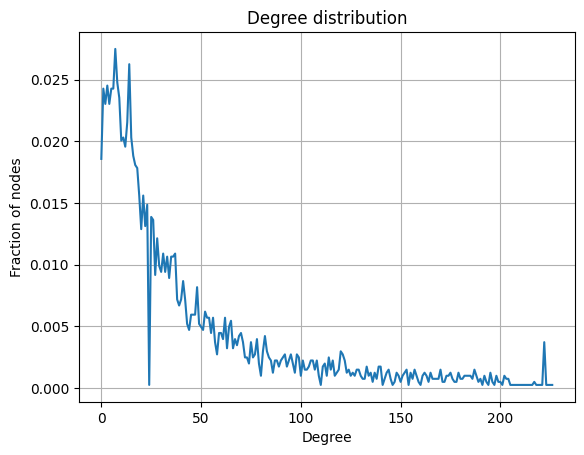

Average Degree: 43.69101262688784


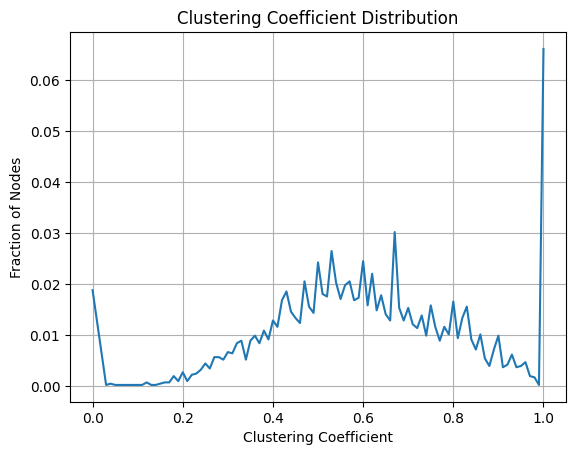

Average Clustering Coefficient: 0.6055467186200876


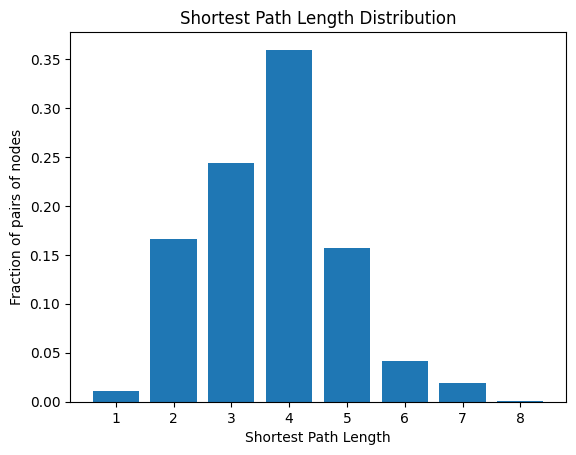

Diameter: 8
Average Path Length: 3.6925068496963913


In [48]:
# Analysis Function
def analyze_graph(G):
    # Degree distribution and average degree
    plot_degree_distribution(G)
    avg_degree = sum(dict(G.degree()).values()) / float(G.number_of_nodes())
    print(f'Average Degree: {avg_degree}')

    # Clustering coefficient distribution and average clustering coefficient
    plot_clustering_distribution(G)
    avg_clustering = nx.average_clustering(G)
    print(f'Average Clustering Coefficient: {avg_clustering}')

    # Shortest path distribution, diameter, and average path length
    plot_shortest_path_distribution(G)
    if nx.is_connected(G):
        diameter = nx.diameter(G)
        avg_path_length = nx.average_shortest_path_length(G)
        print(f'Diameter: {diameter}')
        print(f'Average Path Length: {avg_path_length}')
    else:
        print('Graph is not connected, so diameter and average path length are not defined.')
        
analyze_graph(G)

In [46]:
import random

def erdos_renyi_gnl(N, L):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    possible_edges = [(i, j) for i in range(N) for j in range(i+1, N)]
    edges = random.sample(possible_edges, L)
    G.add_edges_from(edges)
    return G

def erdos_renyi_gnp(N, p):
    G = nx.erdos_renyi_graph(N, p)
    return G

def watts_strogatz(N, k, beta):
    G = nx.watts_strogatz_graph(N, k, beta)
    return G

Erdős-Rényi Model G(N, L)


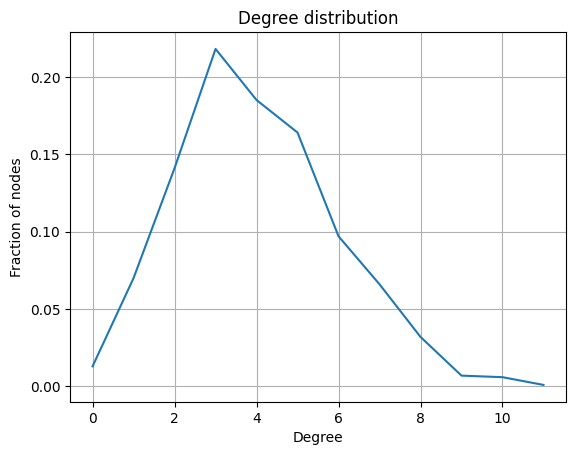

Average Degree: 4.0


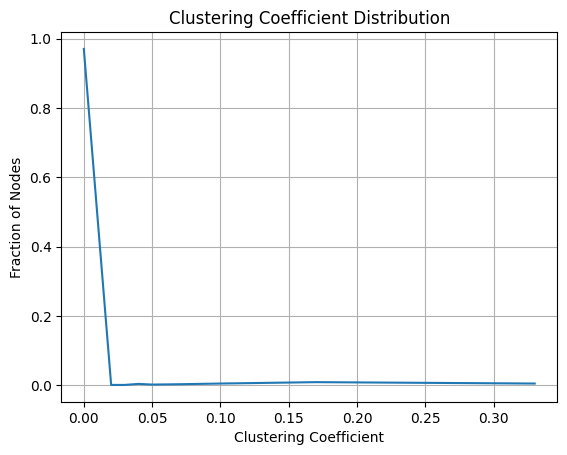

Average Clustering Coefficient: 0.0041507215007215


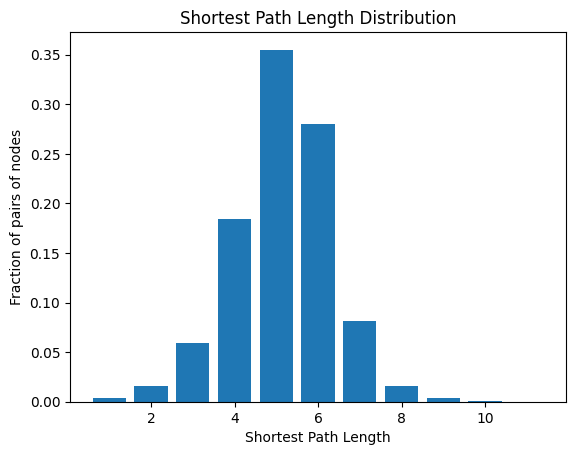

Graph is not connected, so diameter and average path length are not defined.
Erdős-Rényi-Gilbert Model G(N, p)


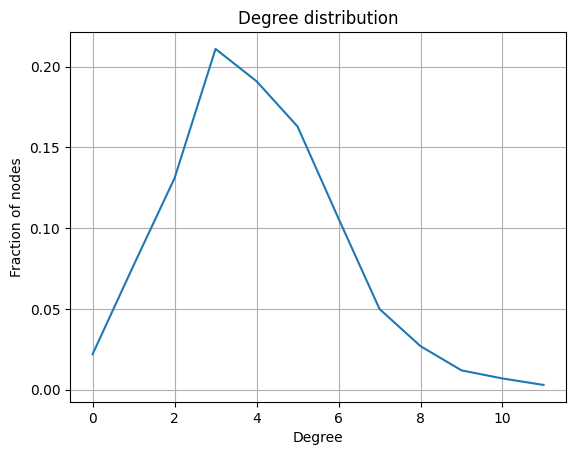

Average Degree: 3.964


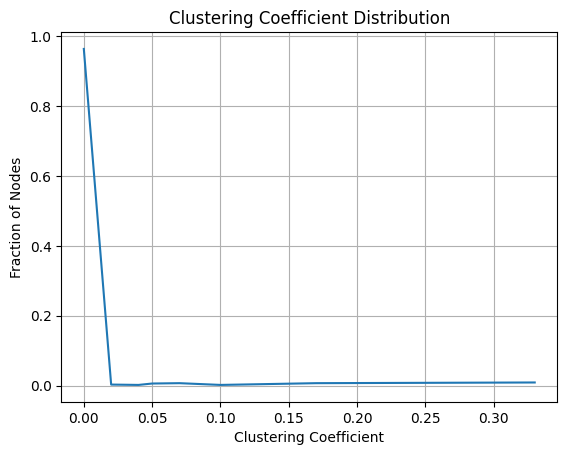

Average Clustering Coefficient: 0.005253102453102451


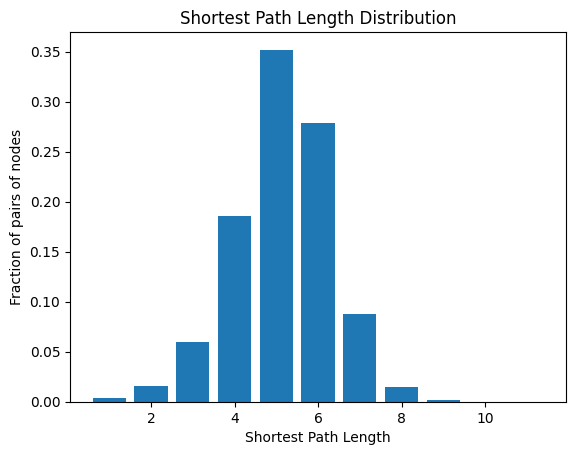

Graph is not connected, so diameter and average path length are not defined.
Watts-Strogatz Model WS(N, k, β)


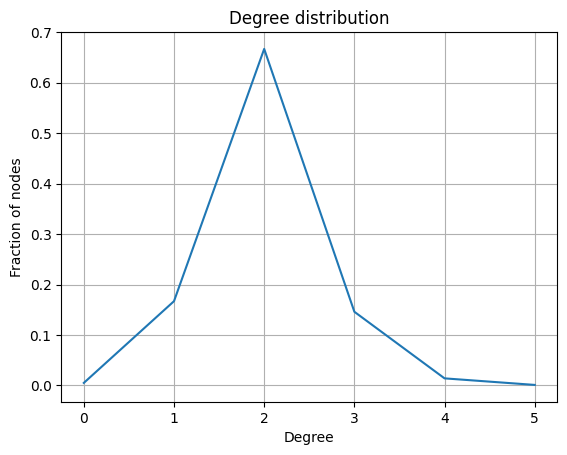

Average Degree: 4.0


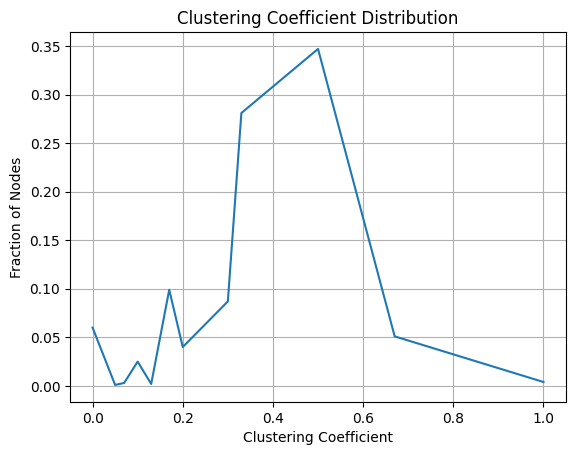

Average Clustering Coefficient: 0.3587809523809525


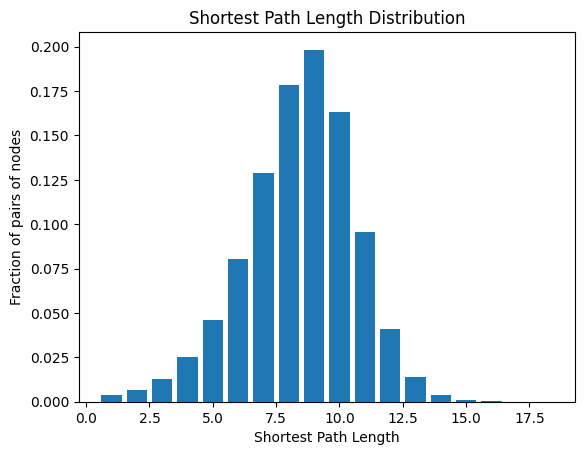

Diameter: 18
Average Path Length: 8.414286286286286


In [51]:
# Parameters
N = 1000
L = 2000
p = 0.004  # Adjusted to match average degree
k = 4
beta = 0.1

# Generate and analyze graphs
G_gnl = erdos_renyi_gnl(N, L)
print("Erdős-Rényi Model G(N, L)")
analyze_graph(G_gnl)

G_gnp = erdos_renyi_gnp(N, p)
print("Erdős-Rényi-Gilbert Model G(N, p)")
analyze_graph(G_gnp)

G_ws = watts_strogatz(N, k, beta)
print("Watts-Strogatz Model WS(N, k, β)")
analyze_graph(G_ws)